In [44]:
import ast
import pandas as pd

def convert_to_list(s):
    return ast.literal_eval(s)

# DataFrameの読み込み
df = pd.read_csv('../results/output_construct.csv', converters={'num_iter_bins': convert_to_list})
df['bytes_per_character'] = df['memory_usage_cdawg'] / df['memory_usage_text']
df['edges_per_character'] = df['num_edges'] / df['text_length']
df['memory_usage_cdawg'] /= 1024.0 * 1024.0
df['memory_usage_ma'] /= 1024.0 * 1024.0
df

,filename,text_length,num_vertices,num_edges,memory_usage_text,memory_usage_cdawg,memory_usage_ma,elapsed_time_lz78,num_iter_bins,bytes_per_character,edges_per_character
0,sources,8,4,10,8,0.000164,0.000412,0.0,"[0, 4, 4]",21.500000,1.250000
1,sources,16,5,18,16,0.000267,0.000732,0.0,"[0, 10, 6]",17.500000,1.125000
2,sources,32,8,36,32,0.000507,0.001236,0.0,"[0, 15, 15, 2]",16.625000,1.125000
3,sources,64,20,76,64,0.001102,0.002243,0.0,"[0, 16, 33, 13, 2]",18.062500,1.187500
4,sources,128,39,148,128,0.002144,0.003754,0.0,"[0, 15, 60, 44, 9]",17.562500,1.156250
...,...,...,...,...,...,...,...,...,...,...,...
71,english,8388608,1662446,5573005,8388608,82.803169,56.620880,26848.0,"[0, 6, 433, 6250, 41198, 158163, 409030, 76697...",10.350396,0.664354
72,english,16777216,3257089,10894050,16777216,161.946938,106.226440,53974.0,"[0, 7, 554, 7957, 59053, 209141, 574823, 11637...",10.121684,0.649336
73,english,33554432,6394592,21388157,33554432,317.948334,203.201523,110521.0,"[0, 8, 698, 9240, 65430, 273546, 813150, 17811...",9.935885,0.637417
74,english,67108864,13603168,45439391,67108864,675.688469,391.471710,228035.0,"[0, 7, 984, 12226, 85725, 381681, 1164561, 266...",10.557632,0.677100


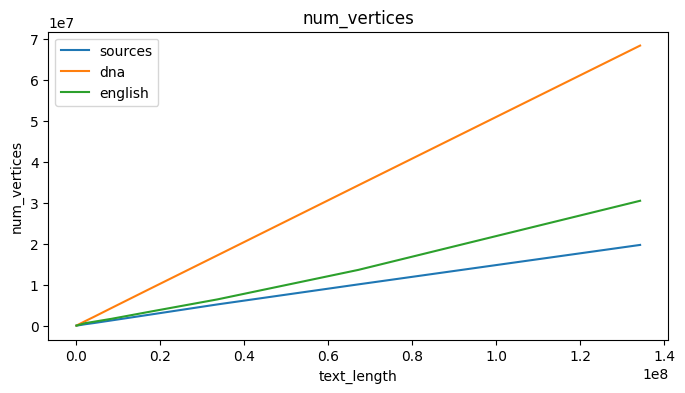

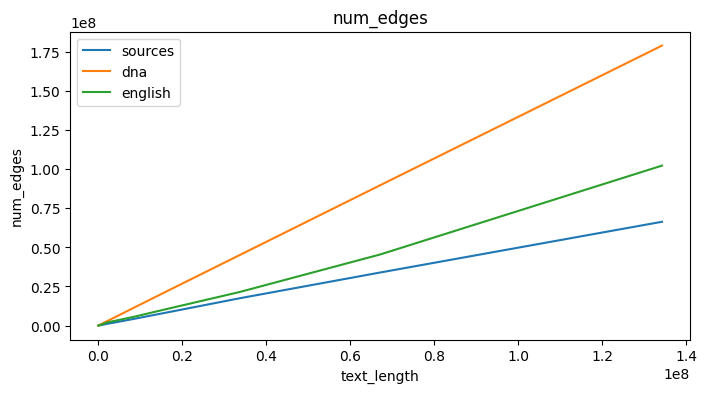

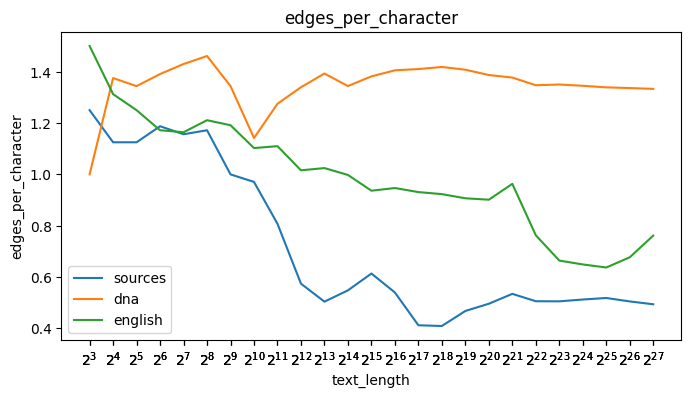

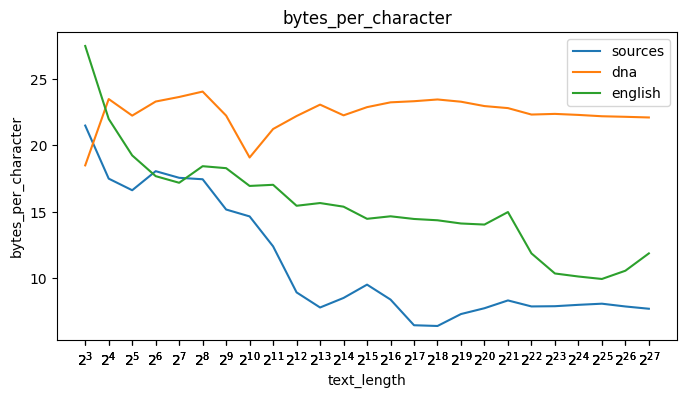

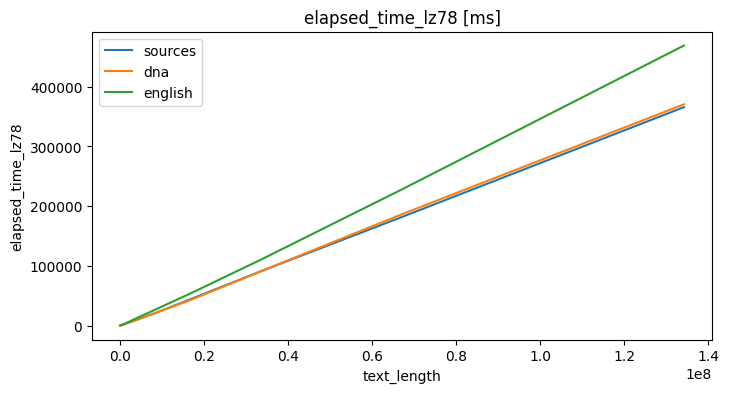

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np


filenames = ['sources', 'dna', 'english']
lengths = [1 << x for x in range(3, 27)]


for label in ['num_vertices', 'num_edges', 'edges_per_character', 'bytes_per_character', 'elapsed_time_lz78']:
    fig, ax = plt.subplots(figsize=(8, 4))
    # for filename in filenames:
    sns.lineplot(df, x='text_length', y=label, hue='filename', ax=ax)
    if label.startswith('memory_usage'):
        ax.set_title(label + ' [kB]')
    if label.endswith('per_character'):
        ax.set_xscale('log', base=2)
        ax.set_xticks(df['text_length'])
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"$2^{{{int(np.log2(x))}}}$"))
        ax.set_title(label + ' [bytes]')
    if label.startswith('elapsed_time_lz78'):
        ax.set_title(label + ' [ms]')
    else:
        ax.set_title(label)

    # handler, label = ax.get_legend_handles_labels()
    # ax.legend(handler, filenames)
    ax.legend()


In [46]:
# create the dataframe such that extract the largest data for each file name
df_max = df[df.text_length == 1 << 27].copy()
df_max.drop(columns=['memory_usage_ma', 'memory_usage_text', 'num_iter_bins'], inplace=True)
df_max

,filename,text_length,num_vertices,num_edges,memory_usage_cdawg,elapsed_time_lz78,bytes_per_character,edges_per_character
24,sources,134217728,19702980,66327855,984.544777,365525.0,7.691756,0.494181
50,dna,134217728,68397775,178908741,2830.198475,370265.0,22.110926,1.332974
75,english,134217728,30487059,102211137,1518.610340,468631.0,11.864143,0.761532


In [47]:
# create the dataframe such that extract the largest data for each file name
df_max['sim_memory_usage'] = df_max.num_vertices * 12 + df_max.num_edges * 12
df_max['sim_memory_usage'] /= 1024.0 * 1024.0
df_max

,filename,text_length,num_vertices,num_edges,memory_usage_cdawg,elapsed_time_lz78,bytes_per_character,edges_per_character,sim_memory_usage
24,sources,134217728,19702980,66327855,984.544777,365525.0,7.691756,0.494181,984.544773
50,dna,134217728,68397775,178908741,2830.198475,370265.0,22.110926,1.332974,2830.198471
75,english,134217728,30487059,102211137,1518.610340,468631.0,11.864143,0.761532,1518.610336


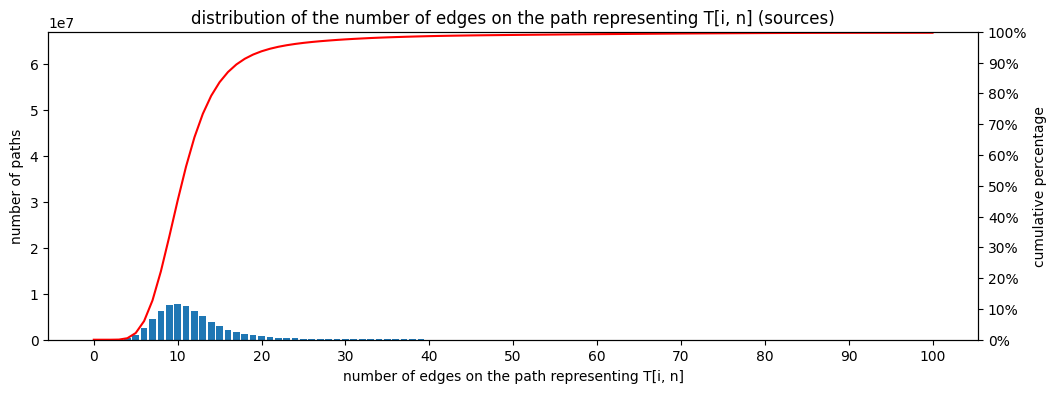

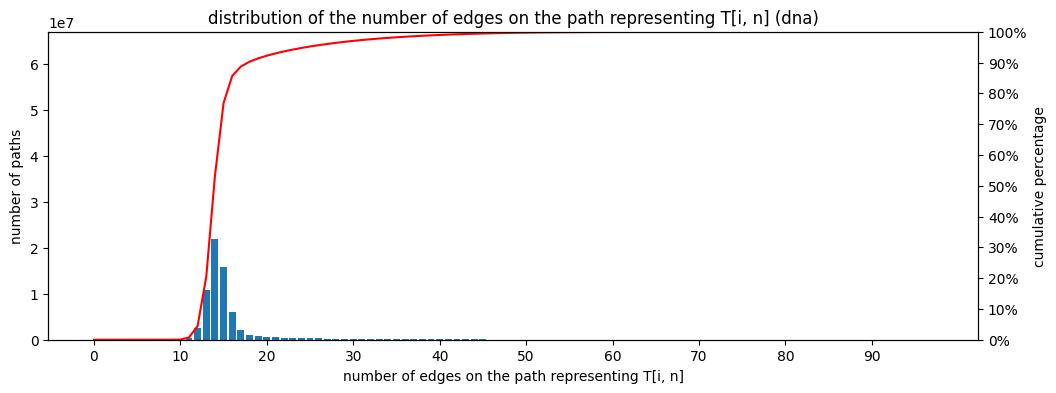

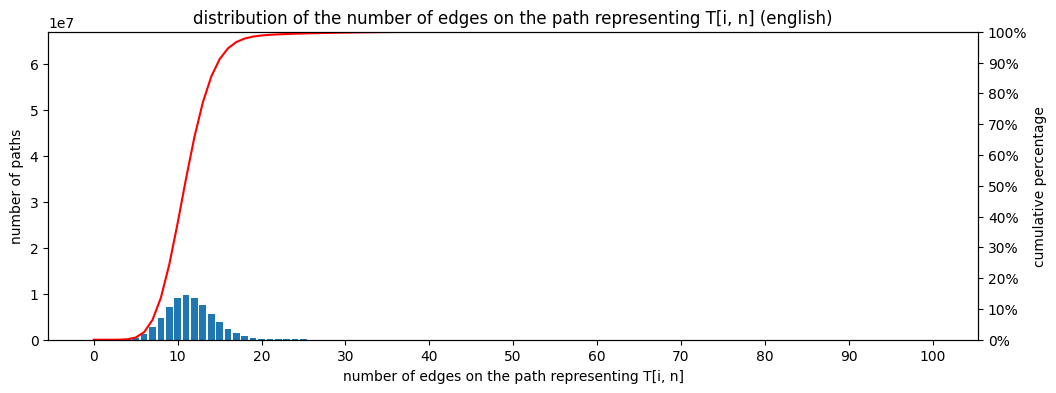

In [48]:
df2 = df.set_index(['filename', 'text_length'])
for filename in filenames:
    fig, ax = plt.subplots(figsize=(12, 4))
    bin = df2.loc[filename, lengths[-1]]['num_iter_bins']
    n = sum(bin)
    bin = bin[:101]

    # Plot the distribution of the number of edges on the path representing S[i, n]
    ax.bar(range(len(bin)), bin)
    ax.set_xticks(range(0, len(bin), 10))
    ax.set_ylim(0, n)
    ax.set_xticklabels(range(0, len(bin), 10))
    ax.set_xlabel('number of edges on the path representing T[i, n]')
    ax.set_ylabel('number of paths')
    # add the cumulative sum of the number of edges on the path representing S[i, n]
    cumsum = np.cumsum(bin)
    ax2 = ax.twinx()
    ax2.plot(range(len(bin)), cumsum, color='red')
    ax2.set_ylim(0, n)
    ax2.set_yticks(range(0, n + 1, n // 10))
    ax2.set_yticklabels([f'{x / n:.0%}' for x in range(0, n + 1, n // 10)])
    ax2.set_ylabel('cumulative percentage')

    ax.set_title(f'distribution of the number of edges on the path representing T[i, n] ({filename})')


    average = sum(map(lambda x: x[0] * x[1], enumerate(bin))) // sum(bin)

    # # Plot vertical line
    # ax.axvline(x=average, color='red', linestyle='--')

    plt.savefig(f'../results/num_iter_bins_{filename}.pdf')
    plt.show()


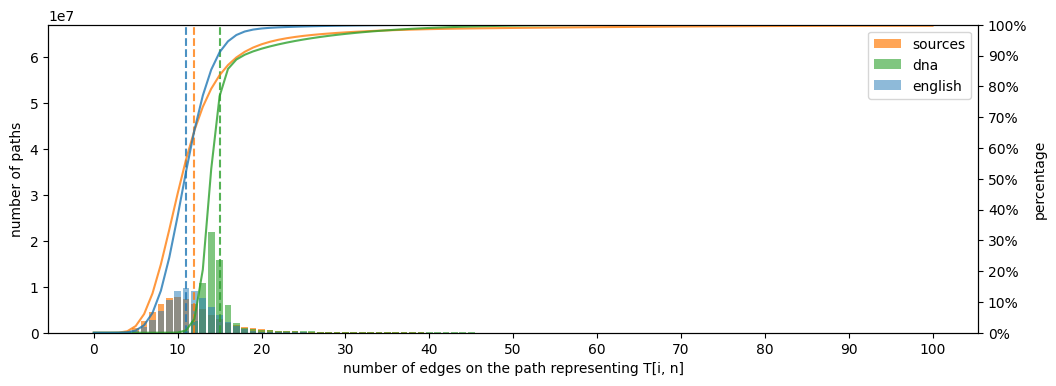

In [59]:
df2 = df.set_index(['filename', 'text_length'])
fig, ax = plt.subplots(figsize=(12, 4))
ax2 = ax.twinx()

colors = { 'sources': 'tab:orange', 'dna': 'tab:green', 'english': 'tab:blue' }

alpha = 0.7

for filename in filenames:
    bin = df2.loc[filename, lengths[-1]]['num_iter_bins']
    n = sum(bin)
    bin = bin[:101]

    # Plot the distribution of the number of edges on the path representing S[i, n]
    ax.bar(range(len(bin)), bin, alpha=alpha, label=filename, color=colors[filename])
    alpha -= 0.1
    ax.set_xticks(range(0, len(bin), 10))
    ax.set_ylim(0, n)
    ax.set_xticklabels(range(0, len(bin), 10))
    ax.set_xlabel('number of edges on the path representing T[i, n]')
    ax.set_ylabel('number of paths')
    # add the cumulative sum of the number of edges on the path representing S[i, n]
    cumsum = np.cumsum(bin)
    ax2.plot(range(len(bin)), cumsum, color=colors[filename], alpha=0.8)
    ax2.set_ylim(0, n)
    ax2.set_yticks(range(0, n + 1, n // 10))
    ax2.set_yticklabels([f'{x / n:.0%}' for x in range(0, n + 1, n // 10)])
    ax2.set_ylabel('percentage')

    average = sum(map(lambda x: x[0] * x[1], enumerate(bin))) // sum(bin)

    # # Plot vertical line
    ax.axvline(x=average, linestyle='--', color=colors[filename], alpha=0.8)
ax.legend()
plt.savefig(f'../results/num_iter_bins.pdf')
plt.show()
